In [ ]:
# Notebook 2: Operaciones básicas con imágenes (recorte, redimensionamiento, rotación)

# Importamos las librerías necesarias
import cv2  # Importamos OpenCV para procesamiento de imágenes
import numpy as np  # Importamos numpy para manejo de arrays
import matplotlib.pyplot as plt  # Importamos matplotlib para visualización
from google.colab.patches import cv2_imshow  # Importamos función para mostrar imágenes en Colab

# Cargar una imagen de ejemplo
from urllib.request import urlopen  # Para abrir URLs



In [ ]:
# URL de una imagen de ejemplo
url = 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg'
# Abrimos la URL y leemos los bytes de la imagen
resp = urlopen(url)
# Convertimos los bytes a un array de numpy
image = np.asarray(bytearray(resp.read()), dtype="uint8")
# Decodificamos el array como una imagen usando OpenCV
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
# OpenCV carga las imágenes en formato BGR, lo convertimos a RGB para visualización correcta
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)



In [ ]:
# 1. Recortar una imagen
# Definimos las coordenadas del recorte: [y_inicio:y_fin, x_inicio:x_fin]
y1, y2 = 100, 400
x1, x2 = 100, 400
start_y, start_x = int(y1 * 0.25), int(x1 * 0.25)  # Punto de inicio (25% de cada dimensión)
end_y, end_x = int(y2 * 0.75), int(x2 * 0.75)  # Punto final (75% de cada dimensión)
cropped_image = image_rgb[start_y:end_y, start_x:end_x]  # Recortamos la región central


In [ ]:
# 2. Redimensionar una imagen
# Definimos las nuevas dimensiones (ancho, alto)
new_width, new_height = 200, 200  # Nuevas dimensiones para redimensionar
resized_image = cv2.resize(image_rgb, (new_width, new_height))  # Redimensionamos la imagen

In [ ]:
# 3. Rotar una imagen
# Obtenemos las dimensiones de la imagen
height, width = image_rgb.shape[:2]
# Definimos el centro de la imagen
center = (width // 2, height // 2)
# Definimos la matriz de rotación: (centro, ángulo, escala)
angle = 45  # Ángulo de rotación en grados
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1)  # Rotación de 45 grados
# Aplicamos la transformación afín para rotar la imagen
rotated_image = cv2.warpAffine(image_rgb, rotation_matrix, (width, height))



In [ ]:
# 4. Voltear una imagen
# Volteamos horizontalmente (1 = horizontal, 0 = vertical, -1 = ambos)
flipped_h = cv2.flip(image_rgb, 1)
# Volteamos verticalmente
flipped_v = cv2.flip(image_rgb, 0)



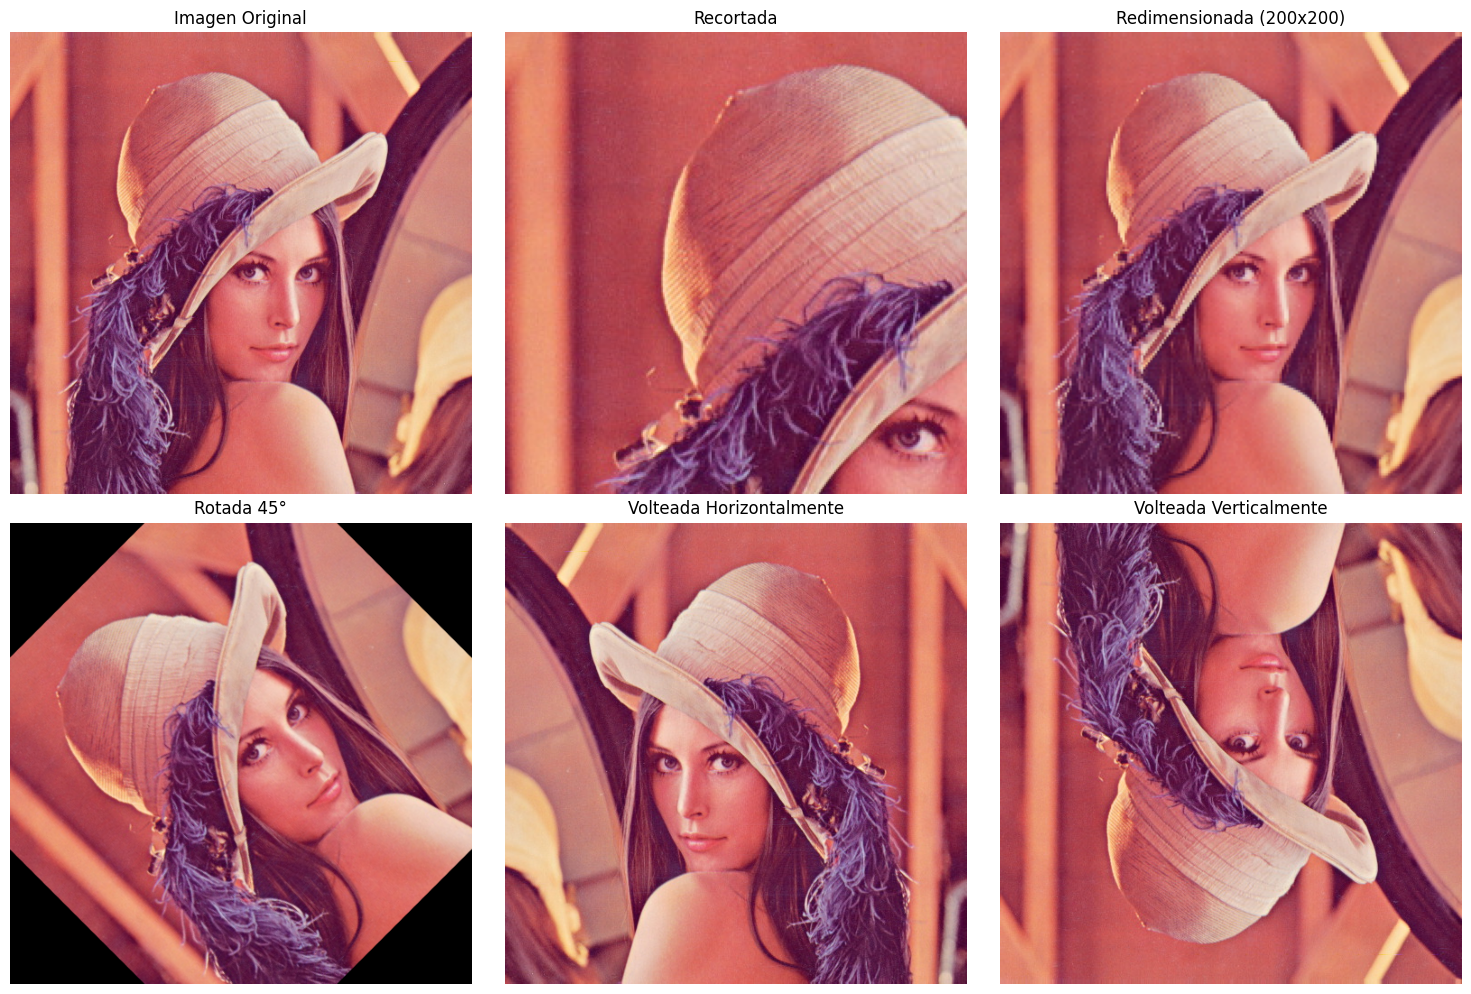

In [ ]:
# Visualización de todas las operaciones
plt.figure(figsize=(15, 10))  # Creamos una figura con tamaño específico

# Imagen original
plt.subplot(2, 3, 1)  # Creamos un subplot en la posición 1
plt.title('Imagen Original')  # Añadimos un título
plt.imshow(image_rgb)  # Mostramos la imagen
plt.axis('off')  # Ocultamos los ejes

# Imagen recortada
plt.subplot(2, 3, 2) # Creamos un subplot en la posición 2
plt.title('Recortada')
plt.imshow(cropped_image)
plt.axis('off')

# Imagen redimensionada
plt.subplot(2, 3, 3)  # Creamos un subplot en la posición 3
plt.title(f'Redimensionada ({new_width}x{new_height})')  # Añadimos un título
plt.imshow(resized_image)  # Mostramos la imagen redimensionada
plt.axis('off')  # Ocultamos los ejes

# Imagen rotada
plt.subplot(2, 3, 4)  # Creamos un subplot en la posición 4
plt.title(f'Rotada {angle}°')  # Añadimos un título
plt.imshow(rotated_image)  # Mostramos la imagen rotada
plt.axis('off')  # Ocultamos los ejes

# Imagen volteada horizontalmente
plt.subplot(2, 3, 5)  # Creamos un subplot en la posición 5
plt.title('Volteada Horizontalmente')  # Añadimos un título
plt.imshow(flipped_h)  # Mostramos la imagen volteada horizontalmente
plt.axis('off')  # Ocultamos los ejes

# Imagen volteada verticalmente
plt.subplot(2, 3, 6)  # Creamos un subplot en la posición 6
plt.title('Volteada Verticalmente')  # Añadimos un título
plt.imshow(flipped_v)  # Mostramos la imagen volteada verticalmente
plt.axis('off')  # Ocultamos los ejes

plt.tight_layout()  # Ajustamos el layout para que no se superpongan los títulos
plt.show()

In [ ]:

# Imprimimos información de las imágenes
print(f"Dimensiones de la imagen original: {image_rgb.shape}")  # (alto, ancho, canales)
print(f"Dimensiones de la imagen recortada: {cropped_image.shape}")  # (alto, ancho, canales)
print(f"Dimensiones de la imagen redimensionada: {resized_image.shape}")  # (alto, ancho, canales)

Dimensiones de la imagen original: (512, 512, 3)
Dimensiones de la imagen recortada: (275, 275, 3)
Dimensiones de la imagen redimensionada: (200, 200, 3)
